In [1]:
# Handling Data
import pandas as pd
import numpy as np

import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Building Models
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


# Metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from time import perf_counter

# Loading Dataset

In [2]:
# Load the dataset
mailframe = pd.read_csv("emails_dataset_1.csv")

In [3]:
# Get the number of rows and columns in data
mailframe.shape

(5171, 4)

In [4]:
# Display first 5 rows in dataset
mailframe.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [5]:
# Get column names
mailframe.columns

Index(['Unnamed: 0', 'label', 'text', 'label_num'], dtype='object')

In [6]:
# Remove any duplicates if there is any
mailframe.drop_duplicates(inplace = True)

In [7]:
# Removing unnecessary column
mailframe.drop('Unnamed: 0', axis=1, inplace = True)

In [8]:
# Changing colum names
mailframe.columns = ['label', 'mail', 'class']

In [9]:
# Adding a column with the length of the mail text
mailframe['length']  = mailframe['mail'].str.len()

In [10]:
mailframe.head()

,label,mail,class,length
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,327
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524
3,spam,"Subject: photoshop , windows , office . cheap ...",1,414
4,ham,Subject: re : indian springs\r\nthis deal is t...,0,336


In [11]:
# Check if there missing data for each column
mailframe.isnull().any()

label     False
mail      False
class     False
length    False
dtype: bool

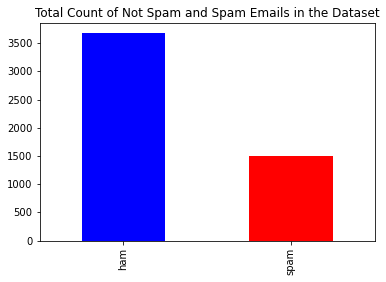

ham     3672
spam    1499
Name: label, dtype: int64


In [12]:
# Displaying the total count of ham and spam emails in the dataset
mailframe['label'].value_counts().plot.bar(color = ["b","r"])
plt.title('Total Count of Not Spam and Spam Emails in the Dataset')
plt.show()
print(mailframe['label'].value_counts())

# Preprocessing Mail Text 

In [13]:
stemmer = WordNetLemmatizer()

# Creating a function to process text in the email message
def process_mail(text):
    
    #1 remove punctuation
    no_punctuation = [char for char in text if char not in string.punctuation]
    no_punctuation = ''.join(no_punctuation)

    #2 remove stopwords
    stop_words = set(stopwords.words('english')) 
    clean_words = [word for word in no_punctuation.split() if word.lower() not in stop_words]
    
    # lemmatization
    clean_words = [stemmer.lemmatize(word) for word in clean_words]

    #3 return a list of clean text words
    return clean_words

In [14]:
# Show the tokenizations
mailframe['mail'].apply(process_mail)

0       [Subject, enron, methanol, meter, 988291, foll...
1       [Subject, hpl, nom, january, 9, 2001, see, att...
2       [Subject, neon, retreat, ho, ho, ho, around, w...
3       [Subject, photoshop, window, office, cheap, ma...
4       [Subject, indian, spring, deal, book, teco, pv...
                              ...                        
5166    [Subject, put, 10, ft, transport, volume, decr...
5167    [Subject, 3, 4, 2000, following, noms, hpl, ta...
5168    [Subject, calpine, daily, gas, nomination, jul...
5169    [Subject, industrial, worksheet, august, 2000,...
5170    [Subject, important, online, banking, alert, d...
Name: mail, Length: 5171, dtype: object

In [15]:
# Convert the collection of text to a matrix of token counts
cVect = CountVectorizer(analyzer = process_mail)
x = cVect.fit_transform((mailframe['mail']))

y = mailframe.label

In [16]:
#Display number of tokens
print('Number of tokens:',x.shape[1])

Number of tokens: 47952


# Splitting Data into Training and Testing Sets

In [17]:
# Split dataset into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

In [18]:
print(f"Shape of training data: {x_train.shape}\nShape of testing data: {x_test.shape}")

Shape of training data: (4136, 47952)
Shape of testing data: (1035, 47952)


# Creating Models

In [19]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from time import perf_counter

In [20]:
models = {
    "Decision Tree": {"model":DecisionTreeClassifier(), "perf":0},
    "Naive Bayes": {"model":MultinomialNB(), "perf":0},
    "Random Forest": {"model":RandomForestClassifier(), "perf":0},
    "Logistic Regression": {"model":LogisticRegression(), "perf":0},
    "KNN": {"model":KNeighborsClassifier(), "perf":0},
    "SVM": {"model":SVC(), "perf":0},
    "SGD": {"model":SGDClassifier(), "perf":0},
    "GBM": {"model":GradientBoostingClassifier(), "perf":0},
    "XGBoost": {"model":XGBClassifier(eval_metric='mlogloss'), "perf":0},
}

# Calculating training time in seconds
for name, model in models.items():
    start = perf_counter()
    model["model"].fit(x_train, y_train)
    duration = perf_counter() - start
    duration = round(duration,2)
    model["perf"] = duration
    print(f"{name:20} trained in {duration} sec")

Decision Tree        trained in 1.17 sec
Naive Bayes          trained in 0.02 sec
Random Forest        trained in 5.49 sec
Logistic Regression  trained in 1.01 sec
KNN                  trained in 0.01 sec
SVM                  trained in 4.61 sec
SGD                  trained in 0.02 sec
GBM                  trained in 28.28 sec


C:\Users\Maram\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBoost              trained in 5.84 sec


In [21]:
models_acc = []
for name, model in models.items():
    models_acc.append([name, model["model"].score(x_test, y_test), 
                       model["perf"]])

In [22]:
models_ass = []
for name, model in models.items():
    # Making predictions
    predicted_class = model["model"].predict(x_test)
    
    # Calculating the performance
    models_ass.append([name, 
                       accuracy_score(y_test, predicted_class), 
                       precision_score(y_test, predicted_class, pos_label = 'spam'),
                       recall_score(y_test, predicted_class, pos_label = 'spam'),
                       f1_score(y_test,predicted_class, pos_label = 'spam'),
                       roc_auc_score(np.where(y_test=='spam',1,0), np.where(predicted_class=='spam',1,0)),
                       model["perf"]])

In [23]:
df_ass = pd.DataFrame(models_ass)
df_ass.columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC', 'Training Time (sec)']
df_ass.reset_index(drop = True, inplace=True)
df_ass

,Model,Accuracy,Precision,Recall,F1-Score,AUC,Training Time (sec)
0,Decision Tree,0.954589,0.929530,0.914191,0.921797,0.942751,1.17
1,Naive Bayes,0.970048,0.950331,0.947195,0.948760,0.963351,0.02
2,Random Forest,0.980676,0.952077,0.983498,0.967532,0.981503,5.49
3,Logistic Regression,0.977778,0.945860,0.980198,0.962723,0.978487,1.01
4,KNN,0.816425,0.619958,0.963696,0.754522,0.859580,0.01
5,SVM,0.963285,0.910217,0.970297,0.939297,0.965340,4.61
6,SGD,0.969082,0.947195,0.947195,0.947195,0.962668,0.02
7,GBM,0.967150,0.911315,0.983498,0.946032,0.971940,28.28
8,XGBoost,0.974879,0.945338,0.970297,0.957655,0.973536,5.84


# Visualization

## Confusion Matrix 

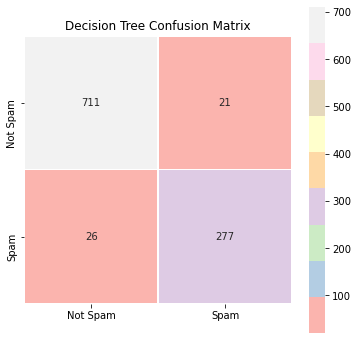

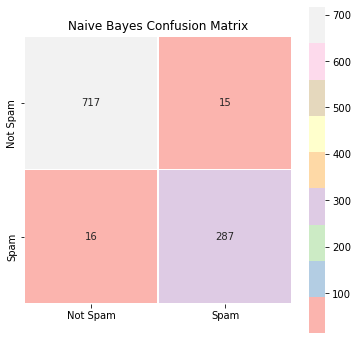

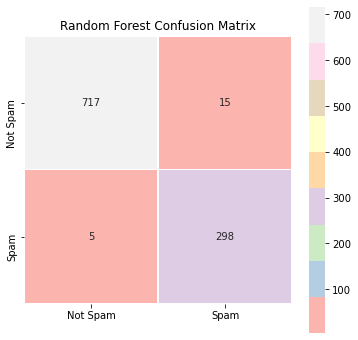

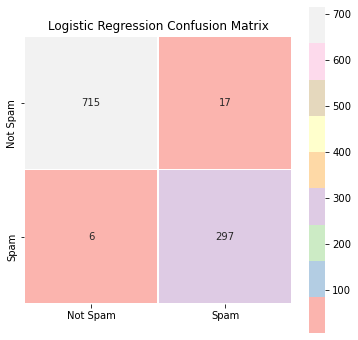

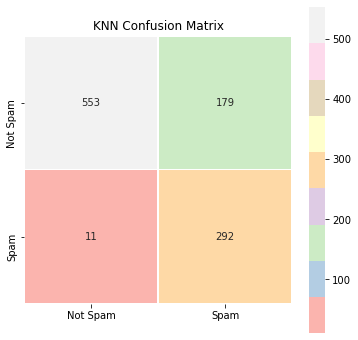

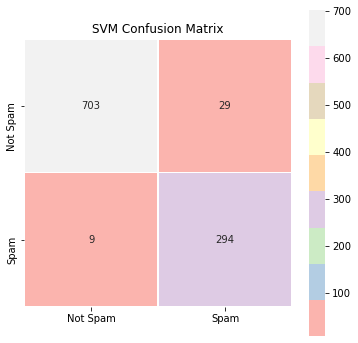

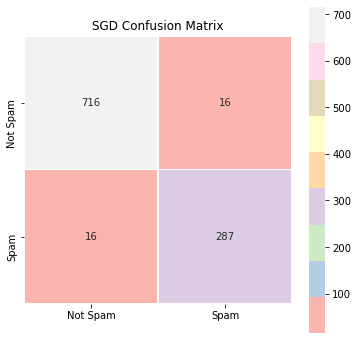

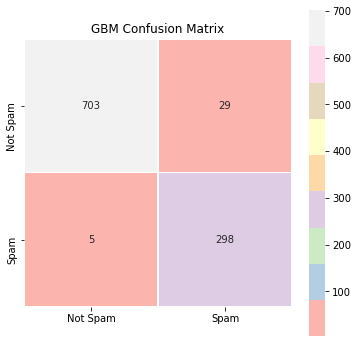

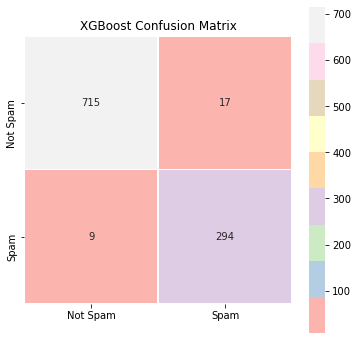

In [24]:
# Displaying confusion matrix for each model
for name, model in models.items():
    predicted_class = model["model"].predict(x_test)
    cmat = confusion_matrix(y_test, predicted_class)
    plt.figure(figsize = (6, 6))
    plt.title(name + ' Confusion Matrix')
    sns.heatmap(cmat, annot=True, fmt=".0f", linewidths=0.5, square = True, cmap = 'Pastel1', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])

## Accuracy 

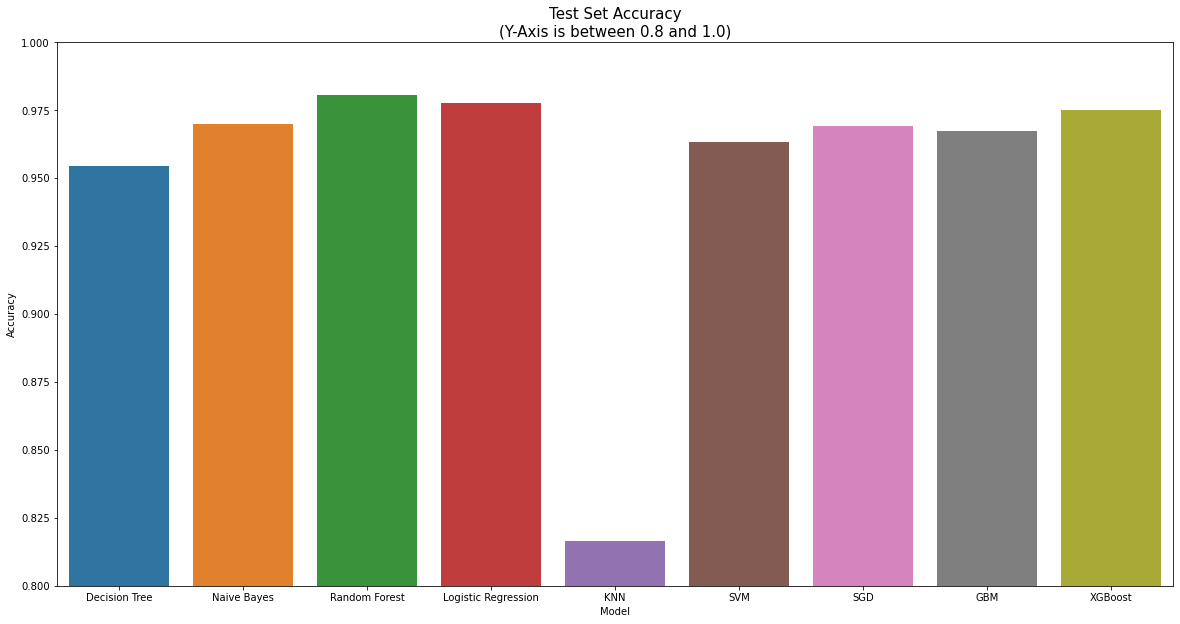

In [25]:
# Comparing the accuracy for each model
plt.figure(figsize = (20,10))
sns.barplot(x = 'Model', y = 'Accuracy', data = df_ass)
plt.title('Test Set Accuracy\n(Y-Axis is between 0.8 and 1.0)', fontsize = 15)
plt.ylim(0.8, 1)
plt.show()


## Training Time 

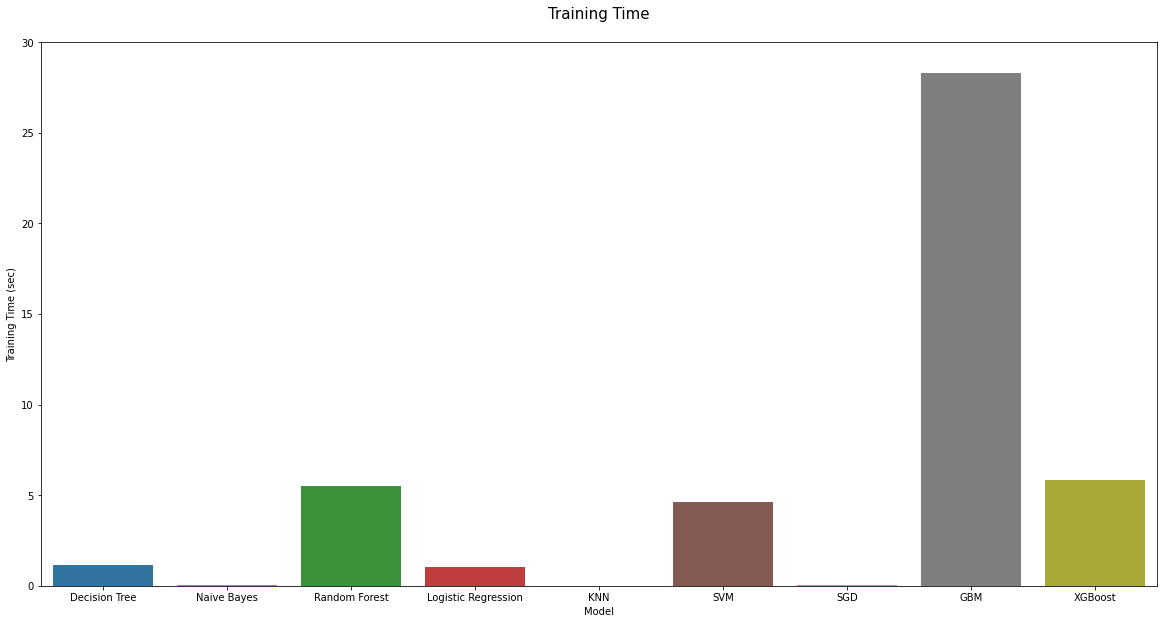

In [26]:
# Comparing the time for each model
plt.figure(figsize = (20,10))
sns.barplot(x = 'Model', y = 'Training Time (sec)', data = df_ass)
plt.title('Training Time\n', fontsize = 15)
plt.ylim(0,30)
plt.show()